# Regresion lineal
creado por Marco Jurado 20308


### >> Abrir el csv

In [399]:
import csv
with open('kc_house_data.csv', 'r') as file:
    csv_reader = csv.reader(file)
    datacsv = []
    for row in csv_reader:
        datacsv.append(row)

In [400]:
print(' Elementos en el dataset \n',datacsv[0:1])
print('\n\n Primeros cinco elementos del dataset \n',datacsv[1:5])
print('\n\n Ulitmos cinco elementos del dataset \n',datacsv[-5:])
print('\n\n Data tiene un size the ',len(datacsv))

 Elementos en el dataset 
 [['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]


 Primeros cinco elementos del dataset 
 [['7129300520', '20141013T000000', '221900', '3', '1', '1180', '5650', '1', '0', '0', '3', '7', '1180', '0', '1955', '0', '98178', '47.5112', '-122.257', '1340', '5650'], ['6414100192', '20141209T000000', '538000', '3', '2.25', '2570', '7242', '2', '0', '0', '3', '7', '2170', '400', '1951', '1991', '98125', '47.721', '-122.319', '1690', '7639'], ['5631500400', '20150225T000000', '180000', '2', '1', '770', '10000', '1', '0', '0', '3', '6', '770', '0', '1933', '0', '98028', '47.7379', '-122.233', '2720', '8062'], ['2487200875', '20141209T000000', '604000', '4', '3', '1960', '5000', '1', '0', '0', '5', '7', '1050', '910', '1965', '0', '98136', '47.5208', '-122.393', '1360', '50

crear arreglo de numpy con instruccion de genfromtxt

In [401]:
import numpy as np
data = np.array(np.genfromtxt('kc_house_data.csv', delimiter=',', skip_header=True))
data

array([[         nan,          nan,  2.21900e+05, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [         nan,          nan,  5.38000e+05, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [         nan,          nan,  1.80000e+05, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [         nan,          nan,  4.02101e+05, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [         nan,          nan,  4.00000e+05, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [         nan,          nan,  3.25000e+05, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

Ahora limpio las dos variables de price y sqft living

In [402]:
data = data[~np.isnan(data[:,2])] # price
data = data[~np.isnan(data[:,5])] # sqft living
data.shape


(21613, 21)

Funciones que serán utiles tanto para regresió lineal como para gradiente. 

In [403]:
norm = lambda v: (sum(v**2))**0.5
cost = lambda X, y, t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)

Function de Regresion Lineal <br>
Segun fue visto en clase

In [404]:
def regLineal(X, y, t, cost, grad, a=0.1, n=1000, on_step=None): 
    costs = []
    for i in range(n):
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))
        if on_step:
            on_step(t)
    
    return t, costs

Function de Gradiente vista en clase

In [405]:
def gradient_descent(theta, X, y, funcionCostos, costoGradiente, learning_rate=0.01, threshold=0.001, max_iter=10000):
    tempTheta = theta
    i = 0
    costs, norms = [], []
    while np.linalg.norm(costoGradiente(tempTheta, X, y, 0.1)) > threshold and i < max_iter:
        tempTheta -= learning_rate * costoGradiente(tempTheta, X, y, 0.1)
        i += 1
        costs.append(funcionCostos(tempTheta, X, y, 0.1))
        norms.append(tempTheta.copy())

    return tempTheta, costs, norms

Function de costo linear

In [406]:
def costoLinear(theta, X, y, lmbd):
    return (( (X @ theta) - y) ** 2).sum() / (2 * len(X)) + ((lmbd / (2 * len(X))) * (theta[1:] ** 2).sum())

Function de costo gradiente

In [407]:
def costoGradiente(theta, X, y, lmbd):
    h = X @ theta + 0
    theta_copy = theta.copy()
    theta_copy[0] = 0
    reg_prime = lmbd * theta_copy / len(X)
    return ((X.T @ (h - y)) / len(X)) + reg_prime

### >> Task 1.2 - Modelo de regresión lineal

Primero separamos X y Y. Siendo estas:
- price
- sqft living

In [408]:
X = data[:, 5].reshape(-1, 1)
Y = data[:, 2].reshape(-1, 1)

ahora hay que calcular el Xr

In [409]:
Xr = np.column_stack((np.ones_like(X), X))

ahora el primer valor que tomara el theta

In [410]:
theta_0 = np.random.rand(Xr.shape[1],1)
theta_0 = theta_0[~np.isnan(theta_0)].reshape((-1, 1))

Ahora se calcula la regresion lineal

In [411]:
thetaf, cost = regLineal(Xr, Y, theta_0, cost, grad, a=0.00000001, n=75)

Ahora tenemos que calcular el valor de Xm y Xmr

In [412]:
xm = np.array([[0], [len(X)]])
xmr = np.concatenate((np.ones((2, 1)), xm), axis=1)
xmr

array([[1.0000e+00, 0.0000e+00],
       [1.0000e+00, 2.1613e+04]])

In [413]:
ym = xmr @ thetaf

Finalmente demostramos los resultados graficamente

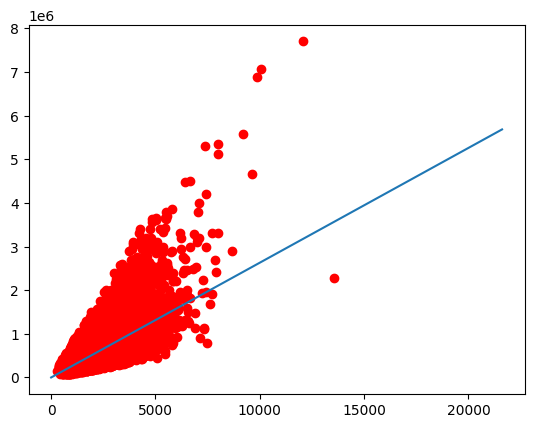

In [414]:
import matplotlib.pyplot as plt
plt.plot(X, Y, 'ro') #puntos
plt.plot(xm,ym) #regresion
plt.show()

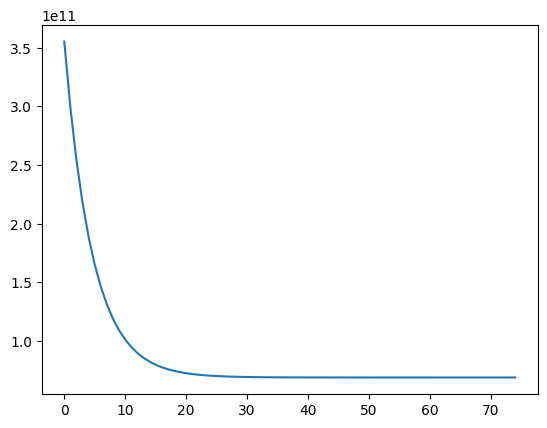

In [415]:
plt.plot(cost) #costo
plt.show()

### >> Task 1.3 - Modelo con decenso de gradiente
repetimos el modelo pero utilizando la función de decenso de gradiente vista en clase

In [416]:
import numpy as np
data = np.array(np.genfromtxt('kc_house_data.csv', delimiter=',', skip_header=True))
data

array([[         nan,          nan,  2.21900e+05, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [         nan,          nan,  5.38000e+05, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [         nan,          nan,  1.80000e+05, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [         nan,          nan,  4.02101e+05, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [         nan,          nan,  4.00000e+05, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [         nan,          nan,  3.25000e+05, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [417]:
X = data[:, 5].reshape(-1, 1)
Y = data[:, 2].reshape(-1, 1)
m, n = X.shape

In [418]:
Xr = np.column_stack((np.ones_like(X), X))

In [419]:
m

21613

In [420]:
n

1

ahora primer valor de theta

In [421]:
theta_0 = np.random.rand(Xr.shape[1],1)
theta_0 = theta_0[~np.isnan(theta_0)].reshape((-1, 1))

Ahora se calcula con el gradient descent

In [422]:
r_theta, costs, thetas = gradient_descent(theta_0, Xr, Y, costoLinear, costoGradiente, learning_rate=0.00000001, threshold=0.001, max_iter=500)

In [423]:
r_theta

array([[2.21507857e-01],
       [2.63089100e+02]])

In [424]:
costs

[194656418565.0597,
 178508847891.57553,
 163987615603.20172,
 150928921423.32394,
 139185462583.38922,
 128624772239.801,
 119127725240.84048,
 110587194388.58623,
 102906842038.39363,
 96000033405.11263,
 89788859318.07895,
 84203257401.50352,
 79180221767.12753,
 74663092304.43414,
 70600915551.57231,
 66947869937.58299,
 63662748912.628555,
 60708496135.90756,
 58051787478.14917,
 55662655123.653244,
 53514149531.72698,
 51582035444.424904,
 49844518511.54358,
 48281999449.18592,
 46876852958.791,
 45613228912.82382,
 44476873564.489395,
 43454968764.70663,
 42535987372.701485,
 41709563229.24264,
 40966374225.81111,
 40298037150.71783,
 39697013126.02741,
 39156522568.6121,
 38670468716.091515,
 38233368855.02709,
 37840292475.621284,
 37486805655.303474,
 37168921043.84628,
 36883052885.84184,
 36625976573.18904,
 36394792271.34174,
 36186892209.02009,
 35999931262.41098,
 35831800502.04614,
 35680603403.9649,
 35544634456.82255,
 35422359923.63116,
 35312400541.124374,
 35213515

In [425]:
thetas

[array([[ 0.15678697],
        [14.03519064]]),
 array([[ 0.16189594],
        [26.90997797]]),
 array([[ 0.16673712],
        [39.11920595]]),
 array([[ 0.17132436],
        [50.69728054]]),
 array([[ 0.17567078],
        [61.67682905]]),
 array([[ 0.17978885],
        [72.08879218]]),
 array([[ 0.18369035],
        [81.96251113]]),
 array([[ 0.18738649],
        [91.32581031]]),
 array([[  0.19088789],
        [100.20507576]]),
 array([[  0.1942046],
        [108.6253295]]),
 array([[  0.19734618],
        [116.61030005]]),
 array([[  0.20032168],
        [124.18248927]]),
 array([[  0.20313969],
        [131.36323581]]),
 array([[  0.20580835],
        [138.1727752 ]]),
 array([[  0.20833537],
        [144.63029693]]),
 array([[  0.21072809],
        [150.75399847]]),
 array([[  0.21299343],
        [156.56113658]]),
 array([[  0.215138  ],
        [162.06807595]]),
 array([[  0.21716802],
        [167.29033527]]),
 array([[  0.21908943],
        [172.24263103]]),
 array([[  0.22090

Y los valores de xm, xmr y ym

In [426]:
xm = np.array([[0], [len(X)]])
xmr = np.concatenate((np.ones((2, 1)), xm), axis=1)
xmr

array([[1.0000e+00, 0.0000e+00],
       [1.0000e+00, 2.1613e+04]])

In [427]:
xm

array([[    0],
       [21613]])

In [428]:
ym = xmr @ r_theta
ym

array([[2.21507857e-01],
       [5.68614493e+06]])

Ahora podemos mostrar los resultados obtenidos con matplotlib

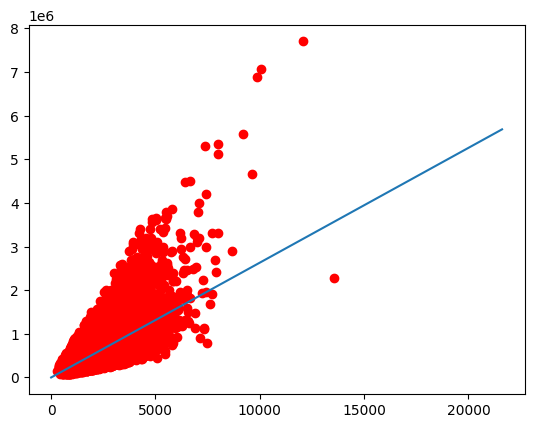

In [429]:
plt.plot(X, Y, 'ro') #puntos
plt.plot(xm,ym) #regresion
plt.show()

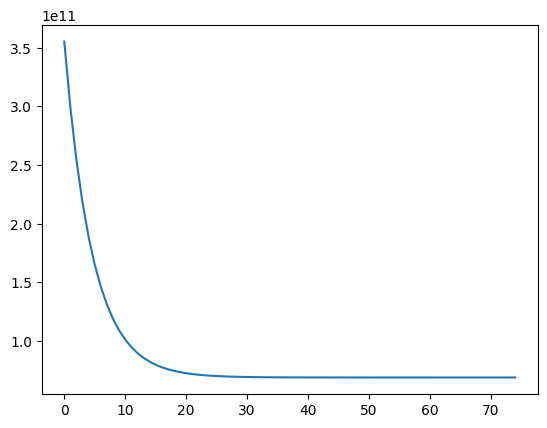

In [430]:
plt.plot(cost) #costo
plt.show()

### >> Task 1.4 - Cross Validation